## Used to produce 'train_enriched.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [2]:
def analyze_missing_values(df):
    """Comprehensive missing values analysis"""
    
    print("\n🕳️ MISSING VALUES ANALYSIS")
    print("="*50)
    
    # Overall missing statistics
    total_cells = df.shape[0] * df.shape[1]
    total_missing = df.isnull().sum().sum()
    missing_percentage = (total_missing / total_cells) * 100
    
    print(f"Total missing values: {total_missing:,} ({missing_percentage:.2f}% of all cells)")
    
    # Missing values per column
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_data = missing_data[missing_data > 0]
    
    if len(missing_data) > 0:
        missing_percent = (missing_data / len(df)) * 100
        missing_df = pd.DataFrame({
            'Missing_Count': missing_data,
            'Missing_Percentage': missing_percent
        })
        
        print(f"\n📊 Top 20 columns with missing values:")
        display(missing_df.head(20))
        
        # Visualize missing values pattern
        if len(missing_data) > 0:
            fig, axes = plt.subplots(2, 2, figsize=(20, 12))
            
            # Missing values heatmap
            missing_matrix = df.isnull()
            sns.heatmap(missing_matrix.iloc[:, :50], cbar=True, ax=axes[0,0], cmap='viridis')
            axes[0,0].set_title('Missing Values Heatmap (First 50 Columns)')
            
            # Missing values bar chart
            top_missing = missing_df.head(20)
            top_missing['Missing_Percentage'].plot(kind='bar', ax=axes[0,1])
            axes[0,1].set_title('Top 20 Columns by Missing Percentage')
            axes[0,1].set_ylabel('Missing Percentage (%)')
            plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=45)
            
            # Missing values over time
            if 'date_id' in df.columns:
                missing_by_date = df.groupby('date_id').apply(lambda x: x.isnull().sum().sum())
                axes[1,0].plot(missing_by_date.index, missing_by_date.values)
                axes[1,0].set_title('Missing Values Over Time')
                axes[1,0].set_xlabel('Date ID')
                axes[1,0].set_ylabel('Total Missing Values')
                
                # Missing percentage by date
                missing_pct_by_date = (missing_by_date / df.shape[1]) * 100
                axes[1,1].plot(missing_pct_by_date.index, missing_pct_by_date.values)
                axes[1,1].set_title('Missing Values Percentage Over Time')
                axes[1,1].set_xlabel('Date ID')
                axes[1,1].set_ylabel('Missing Percentage (%)')
            
            plt.tight_layout()
            plt.show()
    
    return missing_data

In [3]:
train_df = pd.read_csv('/Users/minqi/Documents/Kaggle/kaggle_hull_tactic_2025/train.csv')
dummy_features = [col for col in train_df.columns if col[0] == 'D']
standard_features = [col for col in train_df.columns if col[0] in ['E','I','M','P','S','V']]
target = ['forward_returns']
features = standard_features + dummy_features


🕳️ MISSING VALUES ANALYSIS
Total missing values: 137,675 (15.63% of all cells)

📊 Top 20 columns with missing values:


,Missing_Count,Missing_Percentage
E7,6969,77.519466
V10,6049,67.285873
S3,5733,63.770857
M1,5547,61.701891
M13,5540,61.624027
M14,5540,61.624027
M6,5043,56.095662
V9,4539,50.489433
S12,3537,39.343715
M5,3283,36.518354


/var/folders/bt/4b3dr6ws7f92mwnjqkr28dg80000gn/T/ipykernel_84185/3912776719.py:46: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_date = df.groupby('date_id').apply(lambda x: x.isnull().sum().sum())


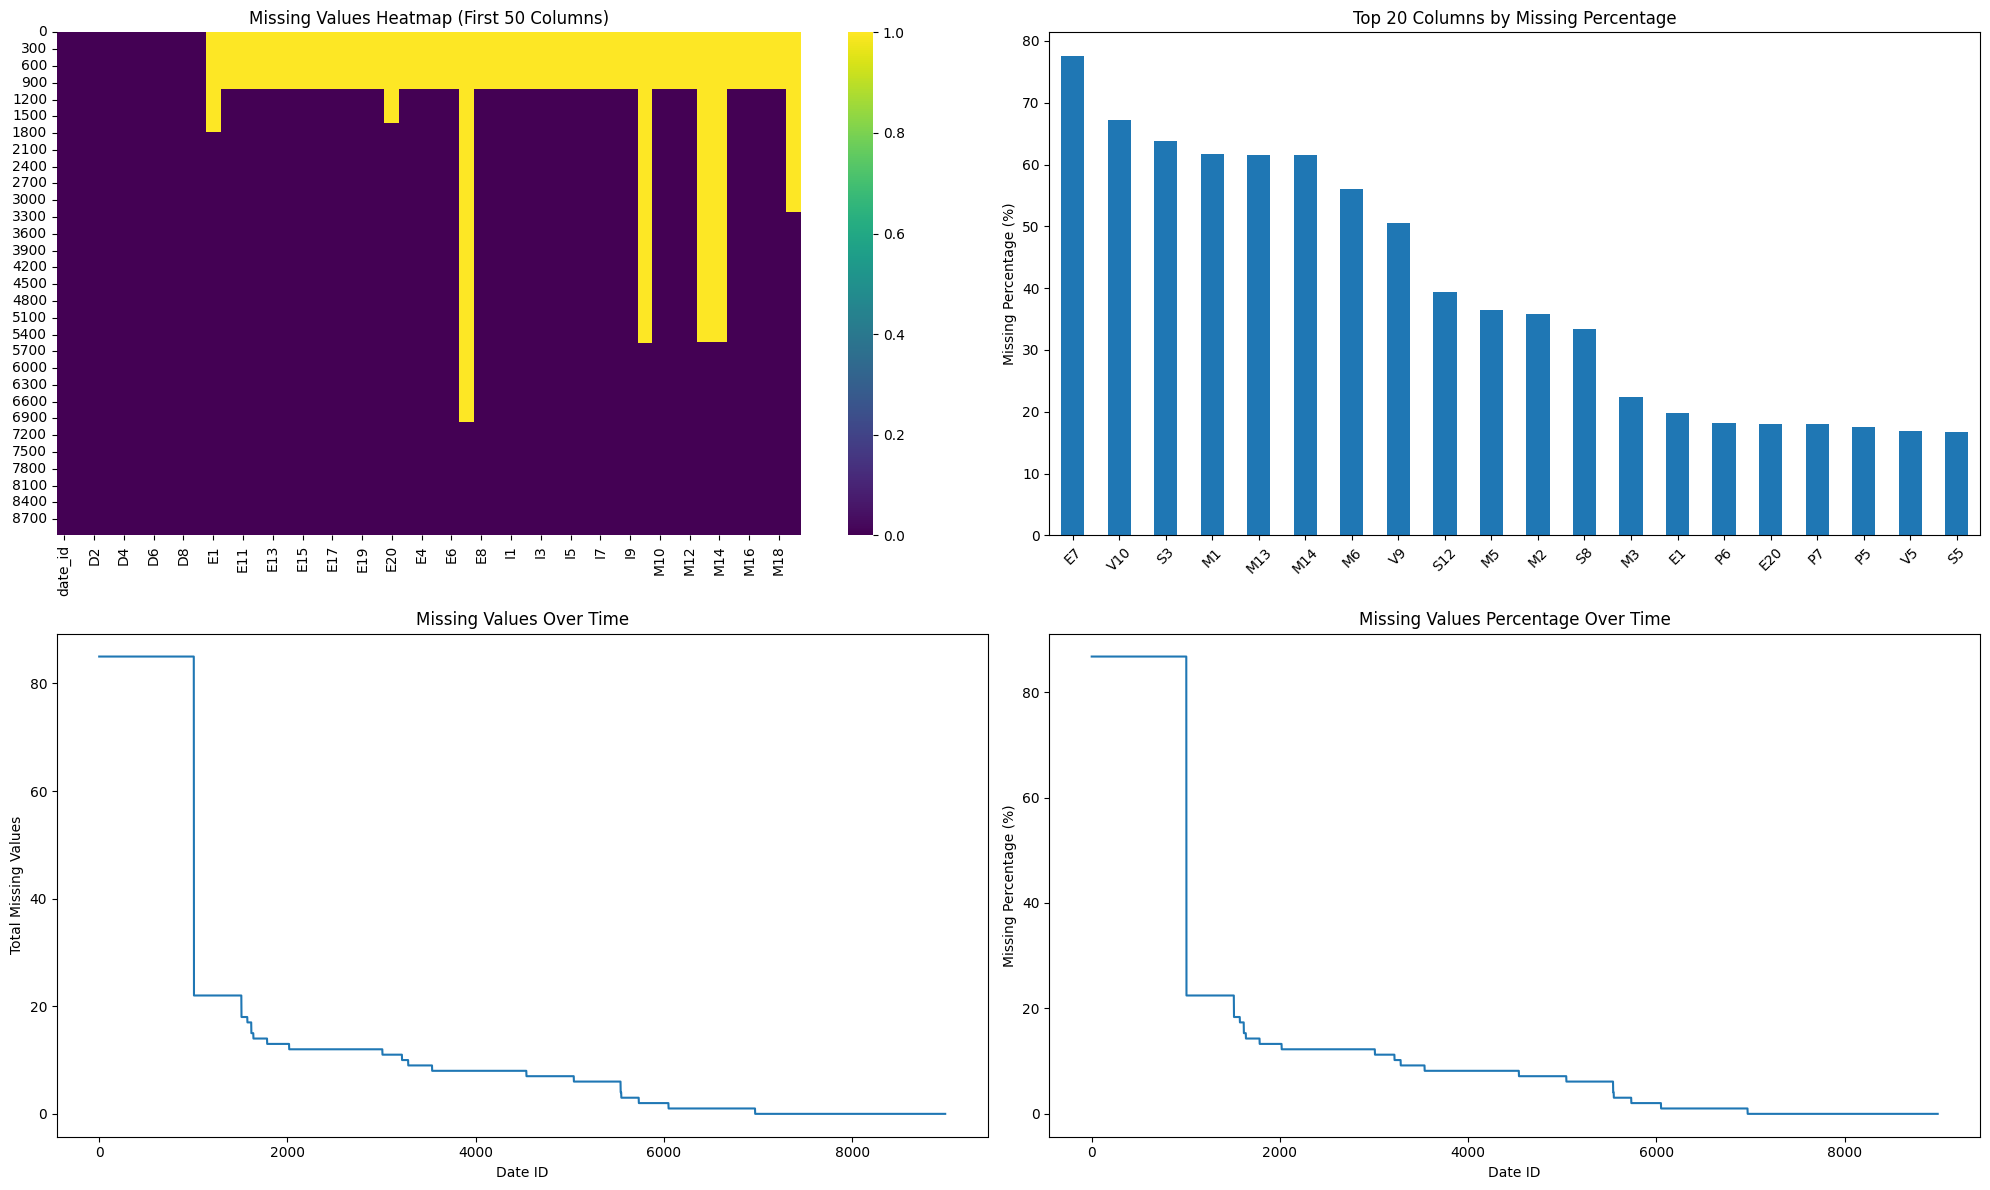

In [4]:
missing_analysis = analyze_missing_values(train_df)

In [5]:
features_to_drop = missing_analysis[missing_analysis > (0.3 * len(train_df))].index.tolist()
features_to_drop

['E7', 'V10', 'S3', 'M1', 'M13', 'M14', 'M6', 'V9', 'S12', 'M5', 'M2', 'S8']

In [6]:
train_df_imputed = train_df.drop(columns=features_to_drop).dropna().reset_index(drop=True)
train_df_imputed

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V2,V3,V4,V5,V6,V7,V8,forward_returns,risk_free_rate,market_forward_excess_returns
0,2018,0,0,0,1,0,-1,0,0,0,...,0.655423,0.815476,0.751323,1.467741,0.000661,3.548550,0.000661,-0.003001,0.000212,-0.003526
1,2019,0,0,0,1,0,-1,0,0,0,...,0.634259,0.766534,0.753968,1.097433,0.000661,3.632840,0.000661,0.004015,0.000207,0.003494
2,2020,0,0,0,1,0,-1,0,0,0,...,0.583995,0.750661,0.725529,0.928160,0.000661,3.372954,0.000661,0.019660,0.000206,0.019140
3,2021,0,0,0,1,0,0,0,1,0,...,0.536376,0.853836,0.730159,0.874947,0.000661,2.757016,0.000661,0.015686,0.000208,0.015165
4,2022,0,0,0,1,1,0,0,1,0,...,0.494709,0.852513,0.722222,1.317207,0.000661,2.163179,0.000661,-0.000644,0.000208,-0.001164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,8985,0,0,0,0,0,0,0,0,0,...,0.785053,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,0.002457,0.000155,0.001990
6968,8986,0,0,0,0,0,0,0,0,0,...,0.767857,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,0.002312,0.000156,0.001845
6969,8987,0,0,1,0,0,0,0,0,0,...,0.734127,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,0.002891,0.000156,0.002424
6970,8988,0,0,0,0,0,0,0,0,0,...,0.695106,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,0.008310,0.000156,0.007843


In [7]:
# Firtsly create lagged target
forward_returns_lag1 = train_df_imputed['forward_returns'].shift(1)
forward_returns_lag5 = train_df_imputed['forward_returns'].shift(5)
train_df_imputed['forward_returns_lag1'] = forward_returns_lag1
train_df_imputed['forward_returns_lag5'] = forward_returns_lag5

In [8]:
train_df_imputed

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V4,V5,V6,V7,V8,forward_returns,risk_free_rate,market_forward_excess_returns,forward_returns_lag1,forward_returns_lag5
0,2018,0,0,0,1,0,-1,0,0,0,...,0.751323,1.467741,0.000661,3.548550,0.000661,-0.003001,0.000212,-0.003526,NaN,NaN
1,2019,0,0,0,1,0,-1,0,0,0,...,0.753968,1.097433,0.000661,3.632840,0.000661,0.004015,0.000207,0.003494,-0.003001,NaN
2,2020,0,0,0,1,0,-1,0,0,0,...,0.725529,0.928160,0.000661,3.372954,0.000661,0.019660,0.000206,0.019140,0.004015,NaN
3,2021,0,0,0,1,0,0,0,1,0,...,0.730159,0.874947,0.000661,2.757016,0.000661,0.015686,0.000208,0.015165,0.019660,NaN
4,2022,0,0,0,1,1,0,0,1,0,...,0.722222,1.317207,0.000661,2.163179,0.000661,-0.000644,0.000208,-0.001164,0.015686,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,8985,0,0,0,0,0,0,0,0,0,...,0.837963,1.226772,0.822751,-0.707361,0.142857,0.002457,0.000155,0.001990,-0.002896,-0.005964
6968,8986,0,0,0,0,0,0,0,0,0,...,0.837963,0.785877,0.805556,-0.715692,0.196098,0.002312,0.000156,0.001845,0.002457,-0.007410
6969,8987,0,0,1,0,0,0,0,0,0,...,0.787698,0.834898,0.823413,-0.723949,0.133929,0.002891,0.000156,0.002424,0.002312,0.005420
6970,8988,0,0,0,0,0,0,0,0,0,...,0.783730,0.994026,0.851852,-0.684937,0.101852,0.008310,0.000156,0.007843,0.002891,0.008357


In [9]:
from tstools import FeatureEnricher

In [10]:
dummy_features = [col for col in train_df_imputed.columns if col[0] == 'D']
standard_features = [col for col in train_df_imputed.columns if col[0] in ['E','I','M','P','S','V']]
target = ['forward_returns']
features = standard_features + dummy_features

In [11]:
ts_enricher = FeatureEnricher(lags=[1, 5, 10], 
                              rolling_windows=[5, 15, 30],
                              add_pct_change=True)   
train_df_enrich_to_merge = ts_enricher.transform(train_df_imputed, standard_features)    

In [12]:
train_df_enrich_to_merge

,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,...,V8_lag1,V8_lag5,V8_lag10,V8_roll_mean_5,V8_roll_std_5,V8_roll_mean_15,V8_roll_std_15,V8_roll_mean_30,V8_roll_std_30,V8_pctchg
29,1.942390,0.996693,0.018849,0.002976,0.016204,0.002976,0.003638,0.218648,0.481752,-0.280715,...,0.000661,0.000661,0.000661,0.000661,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000
30,1.938593,0.997024,0.018519,0.002646,0.015873,0.002646,0.003307,0.217855,0.480794,-0.281153,...,0.000661,0.000661,0.000661,0.000661,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000
31,1.934812,0.997354,0.018188,0.002315,0.015542,0.002315,0.002976,0.217062,0.479836,-0.281591,...,0.000661,0.000661,0.000661,0.000661,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000
32,1.931047,0.997685,0.017857,0.001984,0.015212,0.001984,0.002646,0.216268,0.478877,-0.282030,...,0.000661,0.000661,0.000661,0.000661,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000
33,1.927299,0.998016,0.017526,0.001653,0.014881,0.001653,0.002315,0.215474,0.477919,-0.282468,...,0.000661,0.000661,0.000661,0.000661,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,1.565379,0.184524,0.019180,0.019180,0.005952,0.005952,0.911376,-0.083496,-0.572447,0.223638,...,0.124669,0.170966,0.109127,0.154101,0.028516,0.121274,0.044973,0.077370,0.062256,0.145889
6968,1.562946,0.184193,0.018849,0.018849,0.005622,0.005622,0.911706,-0.083542,-0.572080,0.222910,...,0.142857,0.141865,0.064153,0.164947,0.032705,0.126874,0.048815,0.083477,0.064652,0.372685
6969,1.560520,0.183862,0.018519,0.018519,0.005291,0.005291,0.912037,-0.083874,-0.572016,0.222211,...,0.196098,0.199405,0.098876,0.151852,0.028266,0.132363,0.044151,0.087776,0.063529,-0.317032
6970,1.558102,0.183532,0.018188,0.018188,0.004960,0.004960,0.912368,-0.084206,-0.571952,0.221513,...,0.133929,0.161706,0.057870,0.139881,0.034937,0.128880,0.044374,0.091127,0.061429,-0.239506


In [13]:
train_df_enriched = pd.merge(
    train_df_enrich_to_merge,
    train_df_imputed.drop(columns=standard_features),
    left_index=True,
    right_index=True,
    how='inner').reset_index(drop=True)

In [14]:
cols_to_front = ['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
other_cols = [c for c in train_df_enriched.columns if c not in cols_to_front]
train_df_enriched = train_df_enriched[cols_to_front + other_cols]

In [15]:
train_df_enriched

,date_id,forward_returns,risk_free_rate,market_forward_excess_returns,E1,E10,E11,E12,E13,E14,...,D2,D3,D4,D5,D6,D7,D8,D9,forward_returns_lag1,forward_returns_lag5
0,2047,0.011194,0.000198,0.010682,1.942390,0.996693,0.018849,0.002976,0.016204,0.002976,...,0,0,1,0,0,1,0,0,-0.000622,0.000636
1,2048,-0.003382,0.000200,-0.003895,1.938593,0.997024,0.018519,0.002646,0.015873,0.002646,...,0,0,1,0,0,0,0,0,0.011194,0.016529
2,2049,0.009564,0.000199,0.009054,1.934812,0.997354,0.018188,0.002315,0.015542,0.002315,...,0,0,1,0,0,0,0,0,-0.003382,0.007505
3,2050,-0.000916,0.000202,-0.001431,1.931047,0.997685,0.017857,0.001984,0.015212,0.001984,...,0,0,1,0,0,0,0,0,0.009564,-0.001241
4,2051,0.004283,0.000201,0.003769,1.927299,0.998016,0.017526,0.001653,0.014881,0.001653,...,0,0,1,0,0,0,0,0,-0.000916,-0.000622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,8985,0.002457,0.000155,0.001990,1.565379,0.184524,0.019180,0.019180,0.005952,0.005952,...,0,0,0,0,0,0,0,0,-0.002896,-0.005964
6939,8986,0.002312,0.000156,0.001845,1.562946,0.184193,0.018849,0.018849,0.005622,0.005622,...,0,0,0,0,0,0,0,0,0.002457,-0.007410
6940,8987,0.002891,0.000156,0.002424,1.560520,0.183862,0.018519,0.018519,0.005291,0.005291,...,0,1,0,0,0,0,0,0,0.002312,0.005420
6941,8988,0.008310,0.000156,0.007843,1.558102,0.183532,0.018188,0.018188,0.004960,0.004960,...,0,0,0,0,0,0,0,0,0.002891,0.008357


In [16]:
train_df_enriched.to_csv('train_enriched.csv', index=False)